## Observations and Insights 

In [1]:
##Observations and Inferences
#Observed data counts were slightly uneven. If the results in the data had a wide range, the increased counts could cause skew.
#Observed data points for mice gender were evenly distributed- but no exploration of correlation was done
#Observed positive linear relationship between the weight of mice and the volume of their tumors. Several Inferences can be made:
    #Does this mean the mouse weighs more because the tumor weighs more? or
    #Does this mean the mouse eats more because they have a tumor?
    #Perhaps the animal care staff simply fed these animals more?
##Observation outside scope of analysis:
#Performed initial analysis (scatterplot to determine if a difference between tumor volumes between sexes is visible)--Yes
    #There is a noticeable difference within each drug regimen between the genders of the mice.
    #Capomulin has a much wider data spread in females and much smaller data spread in males, while
    #Ramicane has a wider data spread in males and much smaller data spread in females. 

In [2]:
# Dependencies for code
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# data file locations
mouse_data = ".//data/Mouse_metadata.csv"
results_data= ".//data/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_data)
results = pd.read_csv(results_data)

#test to ensure data is being read properly
#print(mouse)--good
#print(results)--good

# Combine the data into a single dataset--choose outer to combine the contents of BOTH datasets- nulls will be present
merge_df = pd.merge(mouse, results, how='outer', on='Mouse ID')


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_total=merge_df["Mouse ID"].count()
mouse_count=merge_df["Mouse ID"].nunique()
print(mouse_count)
merge_df["Mouse ID"].count()

249


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=merge_df[merge_df[['Mouse ID', 'Timepoint']].duplicated() == True]


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#results show 5 total duplicates
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
squeaky= pd.concat([merge_df, duplicates]).drop_duplicates(keep=False)
squeaky.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
squeaky["Mouse ID"].count()



1887

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#create the variables to make a summary dataframe!
avg_tumor = np.mean(squeaky["Tumor Volume (mm3)"])
med_tumor = np.median(squeaky["Tumor Volume (mm3)"])
var_tumor = np.var(squeaky["Tumor Volume (mm3)"])
std_tumor = np.std(squeaky["Tumor Volume (mm3)"])

# Assemble the resulting series into a single summary dataframe.
#Variables!!!!! assemble!!!
summarize = pd.DataFrame(
                    {"Mean": avg_tumor,
                     "Median" : med_tumor,
                     "Variance" : var_tumor,
                     "Standard Deviation" : std_tumor
  }, index=["Tumor Volume (mm3)"]
)
type(summarize)

pd.core.frame.DataFrame
#show me the summary!
squeaky.groupby(["Drug Regimen"]).sem()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.575318,0.135755,1.087966,0.527084,0.087557
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group data by Drug Regimen
drug = squeaky.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug--prep for the summary dataframe
tumor_avg = drug['Tumor Volume (mm3)'].mean()
tumor_med = drug['Tumor Volume (mm3)'].median()
tumor_std = drug['Tumor Volume (mm3)'].std()
tumor_sem = drug['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations-
#Summary dataframe-some assembly was required
drug_group = pd.DataFrame({'Mean': tumor_avg, 'Median': tumor_med,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem})

#check the summary was assembled the way I think it should look
drug_group.head()
#yep

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

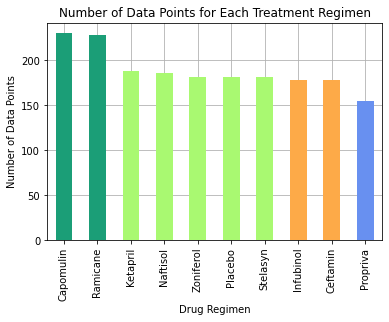

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])

#plotted without colors- it was very difficult to determine differences. Created color palette
#viewers can easily see top few, middle ranged, and lower ranged results
colors = ['#1b9e77','#1b9e77', '#a9f971','#a9f971','#a9f971','#a9f971','#a9f971','#fdaa48', '#fdaa48','#6890F0']

pd_plot = squeaky['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=6,color=colors)

# Set labels for axes
pd_plot.set_xlabel("Drug Regimen")
pd_plot.set_ylabel("Number of Data Points")
pd_plot.set_title("Number of Data Points for Each Treatment Regimen")


# Create a grid - using 'zorder'
#if our .grid(zorder=#) was higher than the zorder in the plot.bar line, grids would overlay the columns
#this decreases readability for viewers
pd_plot.grid(zorder=0)


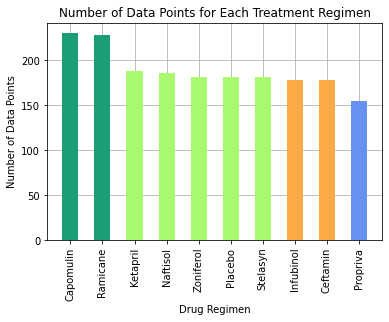

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Calculate the amount of data points for each drug regimen
cnt = squeaky['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x = np.arange(len(cnt))

# Generate a bar blot with the length of the 'counts' series
#plotted without colors- it was very difficult to determine differences. Created color palette
#viewers can easily see top few, middle ranged, and lower ranged results

colors = ['#1b9e77','#1b9e77', '#a9f971','#a9f971','#a9f971','#a9f971','#a9f971','#fdaa48', '#fdaa48','#6890F0']
#plot the barchart
plt.bar(x, cnt, width = 0.5, zorder=6,color=colors)

# Label the tick marks according to the index values in the 'counts' series
ticks = [value for value in x]
plt.xticks(ticks, cnt.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# add grid lines: the data results are fairly clumped together, grid lines help some to make data more readable
plt.grid(zorder=0)

# Display resulting plot
plt.show()


(-1.25, 1.25, -1.25, 1.25)

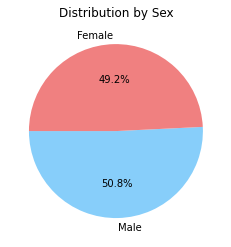

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Identify distribution of data by sex
pd_pie = squeaky['Sex'].value_counts()
#since I changed color of barcharts for readability, I changed colors here too
colors = ["lightskyblue","lightcoral"]
# Plot a pie chart displayed horizontally
pd_pie_plt = pd_pie.plot.pie(autopct="%1.1f%%", startangle=180, colors=colors,title='Distribution by Sex')

# Hide 'y' label
plt.axis('off')


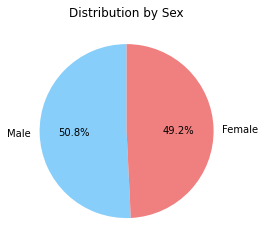

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
pd_pie = squeaky['Sex'].value_counts()

# create a pie chart displayed vertically
#since I changed color of barcharts for readability, I changed colors here too
colors = ["lightskyblue","lightcoral"]
plt.pie(pd_pie, labels=pd_pie.index.values, autopct="%1.1f%%",colors=colors, startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# create dataframe that houses the four drugs
top4 = squeaky.loc[(squeaky['Drug Regimen']=="Ramicane") | (squeaky['Drug Regimen']== "Capomulin") 
                | (squeaky['Drug Regimen']== "Ceftamin")|(squeaky['Drug Regimen']== "Infubinol")]

#print(top4)
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
end_vol = pd.DataFrame(top4.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
#end_vol["Mouse ID"].count()
#now we have max timepoint for each mouseID, we can keep only these in the top4

#end_vol["Mouse ID"].count()--box_step should have 100 rows
box_step = pd.merge(top4, end_vol, left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','max_timepoint'] ,how='right' )
#print(box_step)
#box_step["Mouse ID"].count()
#now that we have the four drug regimens and the max timepoints, we can calculate Quartiles
quartiles = box_step["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of selected regimens is: {lowerq}")
print(f"The upper quartile of selected regimens is: {upperq}")
print(f"The interquartile range of selected regimens is: {iqr}")
print(f"The the median of selected regimens is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of selected regimens is: 37.1877438025
The upper quartile of selected regimens is: 59.930261755
The interquartile range of selected regimens is: 22.742517952499995
The the median of selected regimens is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


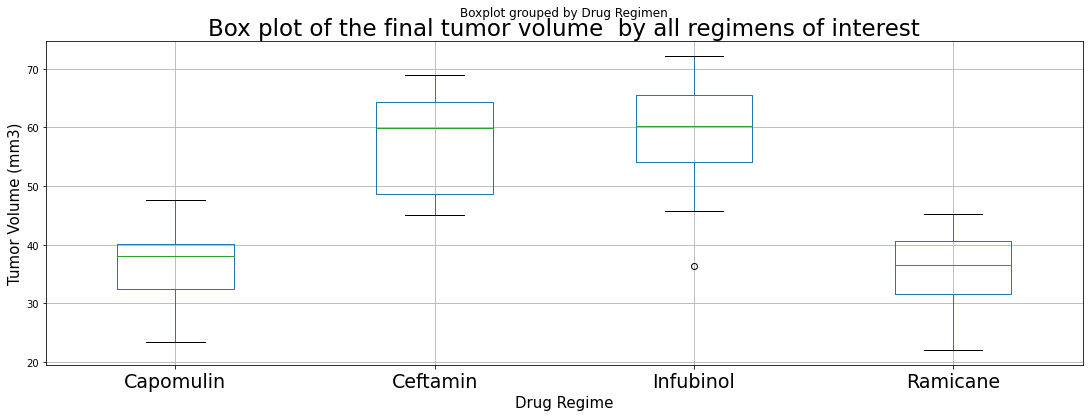

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_step.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', figsize = (18,6))
plt.title("Box plot of the final tumor volume  by all regimens of interest", fontsize=23)
plt.xlabel("Drug Regime", fontsize=15)
plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.xticks(fontsize = 19)
plt.show()

## Line and Scatter Plots

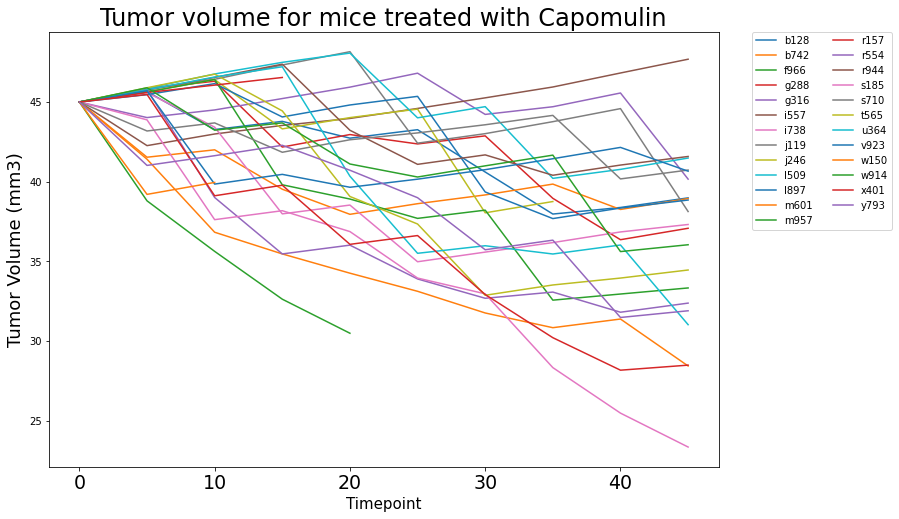

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get dataframe just housing capomulin results
cap = squeaky.loc[:,["Drug Regimen","Mouse ID","Tumor Volume (mm3)", "Timepoint"]]
cap = cap.loc[(cap["Drug Regimen"]=="Capomulin")]
#see how many mice we have in this line plot
mouse = cap["Mouse ID"].unique() #25 mice on capomulin treatment

#fixes the wall of texts that was listing the tumor volume,mouse id
labels=("b128","b742","f966","g288","g316","i557","i738","j119","j246","l509","l897","m601","m957","r157","r554","r944"\
       ,"s185","s710","t565","u364","v923","w150","w914","x401","y793")
#prep groupby dataframe to unstack (pivoting the dataframe) prior to plotting 
cap.groupby(["Timepoint","Mouse ID"]).sum("Tumor Volume (mm3)").unstack().plot(figsize=(12,8))
#legend was ugly, fixed it using labels
plt.legend(labels=labels,loc="upper left", ncol=2, borderaxespad=0., bbox_to_anchor=(1.05,1))

plt.title("Tumor volume for mice treated with Capomulin", fontsize=24)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
plt.xlabel("Timepoint", fontsize=15)
plt.xticks(fontsize = 19)
plt.show()


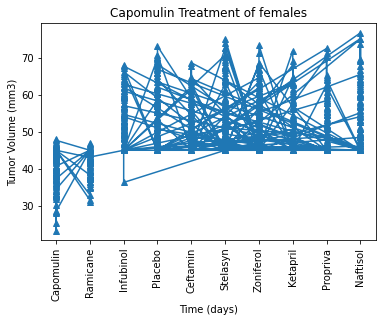

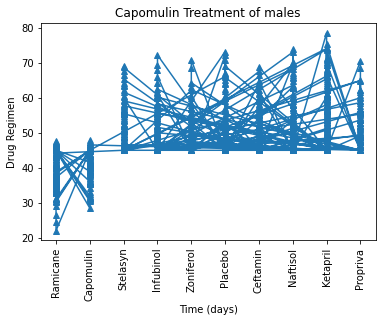

In [17]:
#After looking at the data, wanted to see if there were a noticeable difference in tumors for females vs males
#create dataframes for just columns needed (drug, sex, tumor), filter to create dataframe for each sex, then plot them.
mouse = squeaky.loc[:,["Drug Regimen","Tumor Volume (mm3)", "Sex"]]
fem=mouse.loc[(mouse['Sex']=="Female")]
# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = '^' adds marker on each data point to draw the eye to the large dip around 20 day mark 
plt.plot(fem['Drug Regimen'], fem['Tumor Volume (mm3)'], marker = '^')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of females")
plt.xticks(rotation=90)
# Display plot
plt.show()

mouse = squeaky.loc[:,["Drug Regimen","Tumor Volume (mm3)", "Sex"]]
male=mouse.loc[(mouse['Sex']=="Male")]
# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = '^' adds marker on each data point to draw the eye to the large dip around 20 day mark 
plt.plot(male['Drug Regimen'], male['Tumor Volume (mm3)'], marker = '^')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Drug Regimen")
plt.title("Capomulin Treatment of males")
plt.xticks(rotation=90)
# Display plot
plt.show()
#slight differences noted tumor volumes between sexes of mice. I would perform a multi-linear regression here
#to get exact differences (versus 'eyeballing' differences here), but it is far outside scope of project.

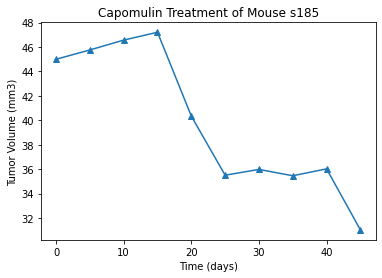

In [20]:
mouse = cap.loc[cap['Mouse ID'] == 'u364']#ID chosen because of viewing previous pane-noted mouse data had large dip

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = '^' adds marker on each data point to draw the eye to the large dip around 20 day mark 
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '^')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

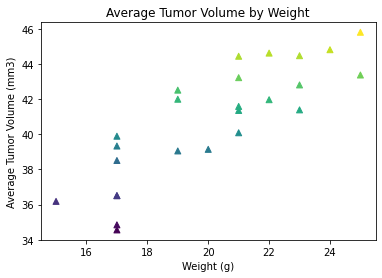

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#tried using previous pane's capomulin results- was ugly- realized I grouped by using same variable name
#lesson learned: use new variables when altering data to be able to reuse code!
cap = squeaky.loc[squeaky['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
vol_avg = pd.DataFrame(cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# join the averages to the weigts and get rid of duplicates
vol_avg = pd.merge(cap, vol_avg, on='Mouse ID')
final_avg= vol_avg[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg

x = final_avg['Weight (g)']
y = final_avg['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with markers and colors for fun (readability only slightly increased)
plt.scatter(x, y,c= y,marker='^')#, cmap=plt.cm.get_cmap("jet", 10)) MY EYES!!!! this made plot less readable (too vibrant)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()
#we can see that (thanks to the colors!) as the weight of the mouse increases, so does the tumor volume

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


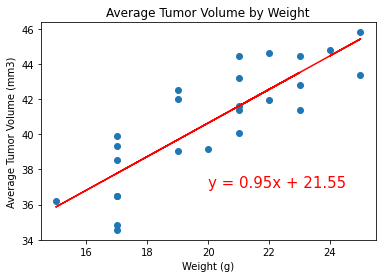

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#code taken from previous pane for linear regression
cap = squeaky.loc[squeaky['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
vol_avg = pd.DataFrame(cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# join the averages to the weigts and get rid of duplicates
vol_avg = pd.merge(cap, vol_avg, on='Mouse ID')
final_avg= vol_avg[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg

x = final_avg['Weight (g)']
y = final_avg['avg_tumor_vol']
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the calculation results
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# find the line (y=mx+b)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# overlay scatterplot with the formula for the line
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# print the formula on the chart
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()